In [1]:
from importnb import Notebook
import numpy as np
import matplotlib.pyplot as plt
from mittag_leffler import ml
from scipy.special import erfc

In [2]:
RA = Notebook.load_file('rational_approximation_2_prabhakar_function.ipynb')

###### Test 1 (see [1])
- $E_{\frac{1}{2}, 1}^1(-z) = \exp(z^2)\,\text{erfc}(z) $

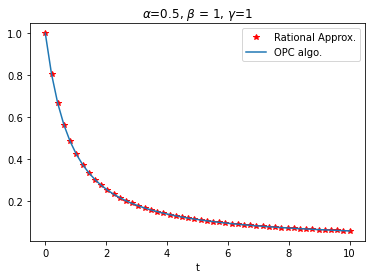

In [3]:
z = np.linspace(0, 10., 50)
m, n, alpha, beta, gamma =  7, 2, 0.5, 1, 1
res = RA.RA(z, m, n, alpha)
sol = np.exp(z**2)*erfc(z)
assert np.allclose(res['z_RA'], sol, rtol=1e-03)
plt.plot(z, res['z_RA'], 'r*')
plt.plot(z, sol)
plt.xlabel('t')
plt.title(r'$\alpha$={}, $\beta$ = {}, $\gamma$={}'.format(alpha, beta, gamma))
plt.legend(['Rational Approx.','OPC algo.' ])

###### Test 2 (see [1])
- $E_{1, r}^1(-z) = \dfrac{(-1)^{r-1}}{z^{r-1}}\left\{\exp(-z) - \sum\limits_{k=0}^{r-2}\dfrac{(-z)^k}{k!}\right\} $

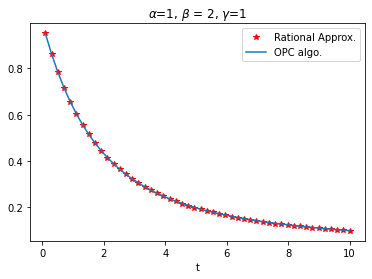

In [4]:
z = np.linspace(0.1, 10., 50) # Excluding 0 because of division by zero (RHS of equation) 
m, n, alpha, beta =  7, 2, 1, 2
res = RA.RA(z, m, n, alpha, beta)
r = beta
sol = (-1)**(r-1)/z**(r-1)*(np.exp(-z) - sum([(-z)**k/np.math.factorial(k) for k in range(r-1)]))
assert np.allclose(res['z_RA'], sol, atol=1e-02)
plt.plot(z, res['z_RA'], 'r*')
plt.plot(z, sol)
plt.xlabel('t')
plt.title(r'$\alpha$={}, $\beta$ = {}, $\gamma$={}'.format(alpha, beta, gamma))
plt.legend(['Rational Approx.','OPC algo.'])

###### Test 3 (see [2])
- $E_{\alpha, \beta}^2(-z) = \dfrac{1}{\alpha}\left[E_{\alpha, \beta-1}(-z) + (1-\beta+\alpha)E_{\alpha, \beta}(-z)\right] $

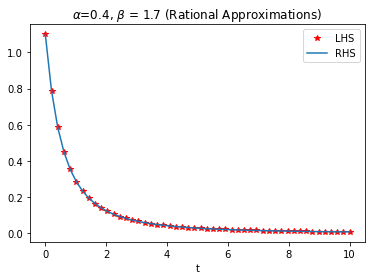

In [5]:
z = np.linspace(0, 10., 50)
m, n, alpha, beta, gamma =  7, 3, 0.4, 1.7, 2
res = RA.RA(z, m, n, alpha, beta, gamma)

n =  4   # change n to conform with m+n+r is even, gamma=r=2 in this case
res1 = RA.RA(z, m, n, alpha, beta-1)
res2 = RA.RA(z, m, n, alpha, beta)

sol = 1/alpha*(res1['z_RA'] + (1-beta+alpha)*res2['z_RA'])
assert np.allclose(res['z_RA'], sol, rtol=1e-03)
plt.plot(z, res['z_RA'], 'r*')
plt.plot(z, sol)
plt.xlabel('t')
plt.title(r'$\alpha$={}, $\beta$ = {} (Rational Approximations)'.format(alpha, beta))
plt.legend(['LHS','RHS' ])

###### Test 4 (see [2])
- $E_{\alpha, \beta}^{\gamma+1}(-z) = \dfrac{E_{\alpha, \beta-\alpha-1}^\gamma(-z) + (1-\beta +\alpha)E_{\alpha, \beta-\alpha}^\gamma(-z)}{-\alpha\gamma z}$

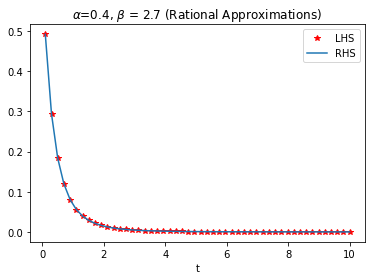

In [6]:
z = np.linspace(0.1, 10., 50) # Excluding 0 because of division by zero (RHS of equation) 
m, n, alpha, beta, gamma =  10, 6, 0.4, 2.7, 3
res = RA.RA(z, m, n, alpha, beta, gamma+1)

n=5      # change n to conform with m+n+r is even, gamma=r=3 in this case
res1 = RA.RA(z, m, n, alpha, beta-alpha-1, gamma)
res2 = RA.RA(z, m, n, alpha, beta-alpha, gamma)

sol = -(res1['z_RA'] + (1-beta+alpha)*res2['z_RA'])/(alpha*gamma*z)
assert np.allclose(res['z_RA'], sol, rtol=1e-03)
plt.plot(z, res['z_RA'], 'r*')
plt.plot(z, sol)
plt.xlabel('t')
plt.title(r'$\alpha$={}, $\beta$ = {} (Rational Approximations)'.format(alpha, beta))
plt.legend(['LHS','RHS' ])

- Other Tests (see [3] for the OPC algorithm)

In [7]:
z = np.linspace(0, 10., 50) # using these z-array in the remaining tests

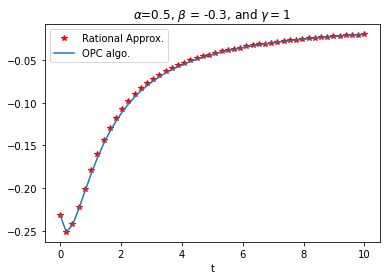

In [8]:
m, n, alpha, beta, gamma =  5, 2, 0.5, -0.3, 1
res = RA.RA(z, m, n, alpha, beta, gamma)
sol = ml(-z, alpha, beta, gamma)
plt.plot(z, res['z_RA'], 'r*')
plt.plot(z, sol)
plt.xlabel('t')
plt.title(r'$\alpha$={}, $\beta$ = {}, and $\gamma = {} $'.format(alpha, beta, gamma))
plt.legend(['Rational Approx.','OPC algo.' ])

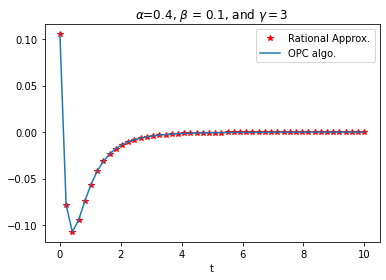

In [9]:
m, n, alpha, beta, gamma =  11, 4, 0.4, 0.1, 3
res = RA.RA(z, m, n, alpha, beta, gamma)
sol = ml(-z, alpha, beta, gamma)
plt.plot(z, res['z_RA'], 'r*')
plt.plot(z, sol)
plt.xlabel('t')
plt.title(r'$\alpha$={}, $\beta$ = {}, and $\gamma = {} $'.format(alpha, beta, gamma))
plt.legend(['Rational Approx.','OPC algo.' ])

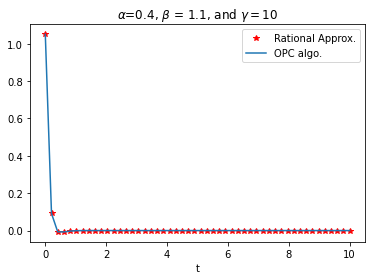

In [10]:
m, n, alpha, beta, gamma =  20, 10, 0.4, 1.1, 10
res = RA.RA(z, m, n, alpha, beta, gamma)
sol = ml(-z, alpha, beta, gamma)
plt.plot(z, res['z_RA'], 'r*')
plt.plot(z, sol)
plt.xlabel('t')
plt.title(r'$\alpha$={}, $\beta$ = {}, and $\gamma = {} $'.format(alpha, beta, gamma))
plt.legend(['Rational Approx.','OPC algo.' ])

#### References
1. I. Podlubny, `Fractional Differential Equations`. Vol. 198, Mathematics in Science and Engineering. Academic Press Inc., San Diego, CA (1999)
2. R. Garra, R. Garrappa, `The Prabhakar or three parameter Mittag-Leffler function: Theory and application`. Commun. Nonlin. Sci. Numer. Simul. 56 (2018), 314–329
3. R. Garrappa, `Numerical evaluation of two and three parameter Mittag-Leffler functions`, SIAM Journal on Numerical Analysis 53 (3) (2015) 1350–1369.